# I. Data Preprocessing

# Import Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## 1. Load Dataset

In [90]:
raw_dataset = pd.read_csv("Bengaluru_House_Data.csv")
raw_dataset.shape

(13320, 9)

## 2. Review Samples

2.1. Review 5 first samples

In [91]:
raw_dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


2.2. Review 5 last samples

In [92]:
raw_dataset.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


## 3. EDA

In [93]:
raw = raw_dataset.copy() # create a copy for EDA 

In [94]:
# basic information about the dataset 
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [95]:
raw.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [96]:
# Distinct values and number of their appearence
def value_count(raw):
    for var in raw.columns:
        print(raw[var].value_counts())
        print("----------------------------")

value_count(raw)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------
availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                    

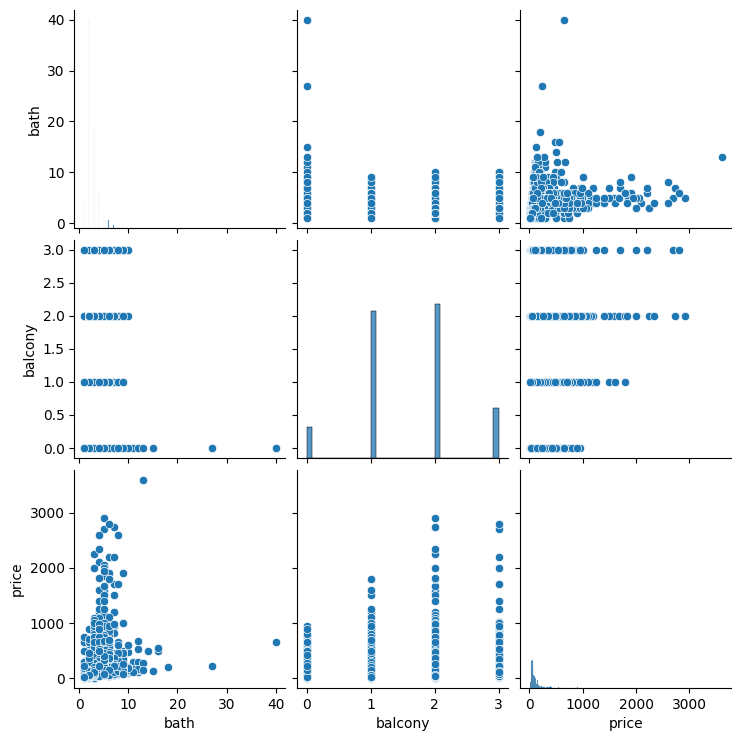

In [97]:
sns.pairplot(raw) 

<Axes: >

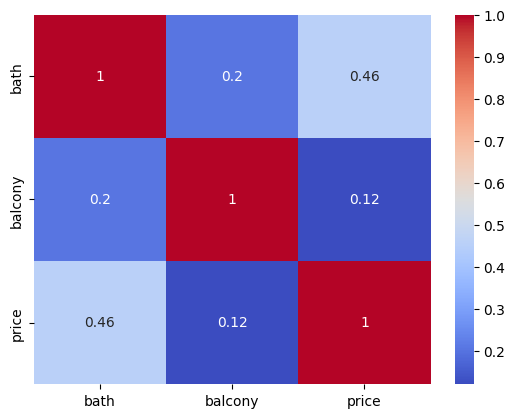

In [98]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(raw[num_vars].corr(), cmap = "coolwarm", annot = True)

## 4. Preparing Data

4.1. Data cleaning

In [99]:
# Find null values
raw.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [100]:
# Rate of null values in each feature
raw.isnull().mean() * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [101]:
raw1 = raw.drop('society', axis = 'columns') # remove 'society' feature since high rate of null values
raw1.shape

(13320, 8)

In [102]:
raw1['balcony'] = raw1['balcony'].fillna(raw1['balcony'].mean()) # replace null values of 'balcony' feature by its average value 
raw1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [103]:
raw2 = raw1.dropna()
raw2.shape

(13246, 8)

In [104]:
raw2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

4.2. Feature Engineering

In [105]:
# Điều chỉnh hiển thị toàn bộ hàng và cột của output thay vì chỉ hiển thị một số hàng/cột đầu và cuối như dault 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Feature 'total_sqft' đang ở dạng category (vì value của nó đang ở nhiều định dạng, ví dụ như khoảng, đơn vị m2, đơn vị yard, ...).
Do đó, cần biết số lần xuất hiện của từng value để quyết định cách chuyển đổi từ dạng category về dạng numeric

In [106]:
raw2['total_sqft'].value_counts()

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225          

In [107]:
# Convert 'total_sqft' values into float
total_sqft_float = []
for str_val in raw2['total_sqft']:
    try:
        total_sqft_float.append(float(str_val))
    except:
        try: # if value is a range, convert into its average value
            temp = []
            temp = str_val.split('-')
            total_sqft_float.append((float(temp[0]) + float(temp[-1])) / 2)
        except: # if value is other types, convert into null value
            total_sqft_float.append(np.nan)

In [108]:
raw3 = raw2.reset_index(drop = True)

In [109]:
# Add total_sqft_float
raw4 = raw3.join(pd.DataFrame({'total_sqft_float' : total_sqft_float}))
raw4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [110]:
raw4.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64

In [111]:
# Remove null value 
raw5 = raw4.dropna()
# View the data
raw5.isnull().sum()

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
total_sqft_float    0
dtype: int64

In [112]:
raw5.shape

(13200, 9)

In [113]:
# Number of each unique value of 'size' feature
raw5['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [126]:
# Convert value of 'size' feature from category into numeric
size_int = []
for str_val in raw5['size']:
    temp = []
    temp = str_val.split(" ")
    try: 
        size_int.append(int(temp[0]))
    except: 
        sizeint.append(np.nan)
        print("Noice = ", str_val)

In [115]:
raw6 = raw5.reset_index(drop = True)
raw7 = raw6.join(pd.DataFrame({'bhk': size_int}))

4.3. Finding Outliers and Removing

<Axes: xlabel='total_sqft_float'>

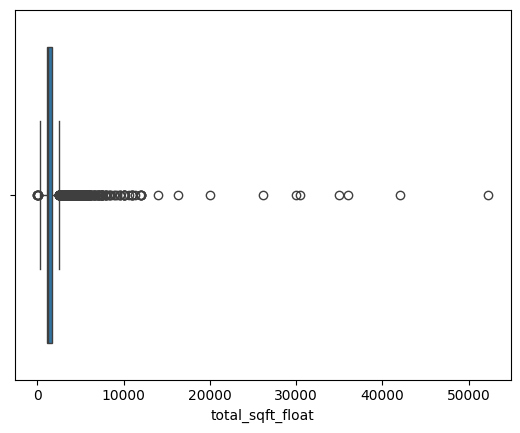

In [116]:
sns.boxplot(x = raw7['total_sqft_float'])

In [124]:
# Remove datapoint which area per room >= 350
raw8 = raw7[-(raw7['total_sqft_float']/raw7['bhk'] < 350)]
raw8.shape

(12106, 10)

In [125]:
# Add price_per_sqft feature
raw8['price_per_sqft'] = raw8['price'] * 100000 / raw8['total_sqft_float']
raw.head()

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_29076/454807716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw8['price_per_sqft'] = raw8['price'] * 100000 / raw8['total_sqft_float']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [119]:
raw8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

# Homework

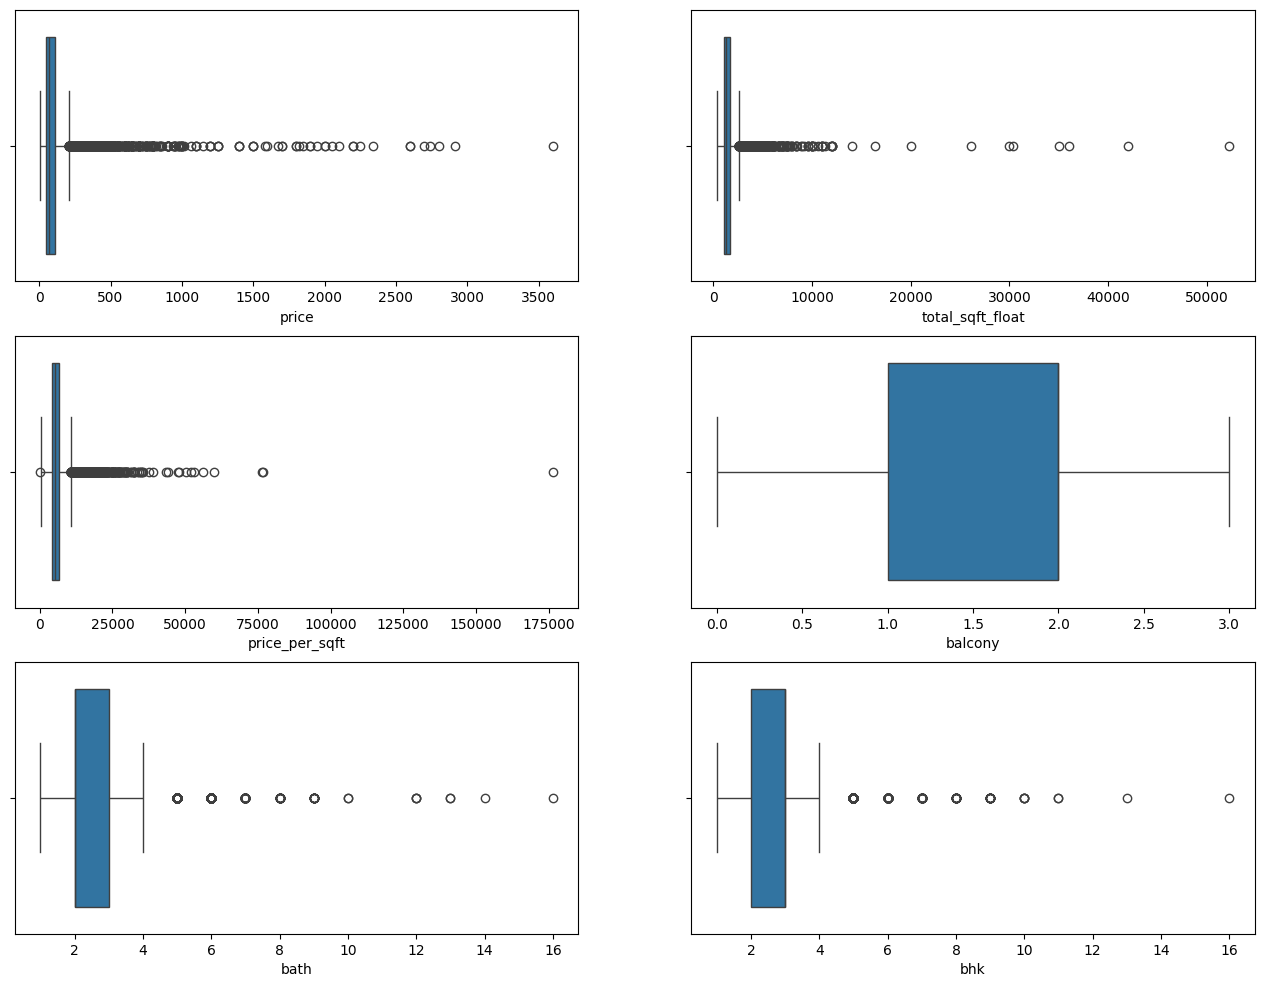

In [120]:
vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize = (16,12))
for i,var in enumerate(vars):
  plt.subplot(3, 2, i+1)
  sns.boxplot(x = raw8[var])

**Exercise 1** Remove 'price_per_sqft' outliers\
Loại bỏ những giá trị ngoài khoảng [mean - std, mean + std]

In [149]:
def remove_pps_outliers(raw):
    raw_out = pd.DataFrame() # create a DataFrame to contain the result

    for key, subraw in raw.groupby('location'):
        mean = np.mean(subraw.price_per_sqft)
        std = np.std(subraw.price_per_sqft)
        print(mean, std)

        reduced_raw = subraw[
            (subraw.price_per_sqft >= (mean - std)) &
            (subraw.price_per_sqft <= (mean + std))
        ]

        raw_out = pd.concat([raw_out, reduced_raw], ignore_index = True)
    return raw_out

In [150]:
raw9 = remove_pps_outliers(raw8)
raw9.shape

4558.404558404558 0.0
6641.366223908918 0.0
7462.686567164179 0.0
7900.452567772315 1494.7289428558165
4969.906244918219 2500.480179148425
4695.924764890282 213.16614420062706
4461.458189463346 1394.9762996311144
5581.818181818182 781.818181818182
4600.0 0.0
5398.0318719248 632.2262657667779
5745.85635359116 0.0
15994.152046783625 4005.8479532163747
7200.0 0.0
2500.0 0.0
11111.111111111111 0.0
27542.372881355932 0.0
5069.124423963133 0.0
9704.184704184703 4184.704184704185
10753.968253968254 6632.803262054946
4419.130434782609 940.8695652173913
12359.253757566757 3730.1654195657898
12147.471388025011 7971.00242242321
9192.412830745627 3461.1941405641815
4814.814814814815 0.0
9238.632218844985 6121.031078589951
5661.538461538462 0.0
11250.493508539152 8377.542455200479
15351.397761940367 5828.742459910954
18166.666666666664 166.66666666666606
9092.338041672787 5511.812608358833
4048.7011831449663 643.3304399655544
6778.042959427207 0.0
12575.0 4951.652829181458
17083.333333333332 0.0
20

(9421, 11)

**Exercise 2** Remove 'bhk' outliers\
Loại bỏ các house có price_per_sqft thấp hơn trung bình price_per_sqft của nhóm có ít phòng hơn

In [154]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([]) # list chứa những value bị remove
    for location, location_df in df.groupby('location'):
        bhk_stats = {} # contain statisctic values (mean, std, count)
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            lower_bhk_stats = bhk_stats.get(bhk - 1) # get statistic value của nhóm nhà có ít phòng hơn (bhk-1)
            if lower_bhk_stats and lower_bhk_stats['count'] > 5: # chỉ thực hiện só sánh khi lower_bhk_stats not null và số sample > 5
                remove_idx = bhk_df[bhk_df['price_per_sqft'] < lower_bhk_stats['mean']].index
                exclude_indices = np.append(exclude_indices, remove_idx)
    return df.drop(exclude_indices, axis='index')    

In [155]:
raw10 = remove_bhk_outliers(raw9)
raw10.shape

(7727, 11)

**Exercise 3** Remove 'bathroom' outliers\
Remove houses that have too many bathrooms

In [158]:
raw10.bath.unique()

array([ 1.,  3.,  2.,  9., 12.,  4., 13.,  5.,  8.,  6.,  7., 16.])

In [ ]:
raw11 = raw10[raw10.bath < raw10.bhk + 2]
raw11.shape

In [159]:
raw11 = raw10[raw10.bath < raw10.bhk + 2]
raw11.shape

(7647, 11)

In [160]:
raw11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Built-up Area,Ready To Move,Anekal,1 RK,351,1.0,1.0,16.0,351.0,1,4558.404558
1,Super built-up Area,Ready To Move,Banaswadi,1 RK,527,1.0,0.0,35.0,527.0,1,6641.366224
2,Super built-up Area,Ready To Move,Basavangudi,1 RK,670,1.0,1.0,50.0,670.0,1,7462.686567
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714


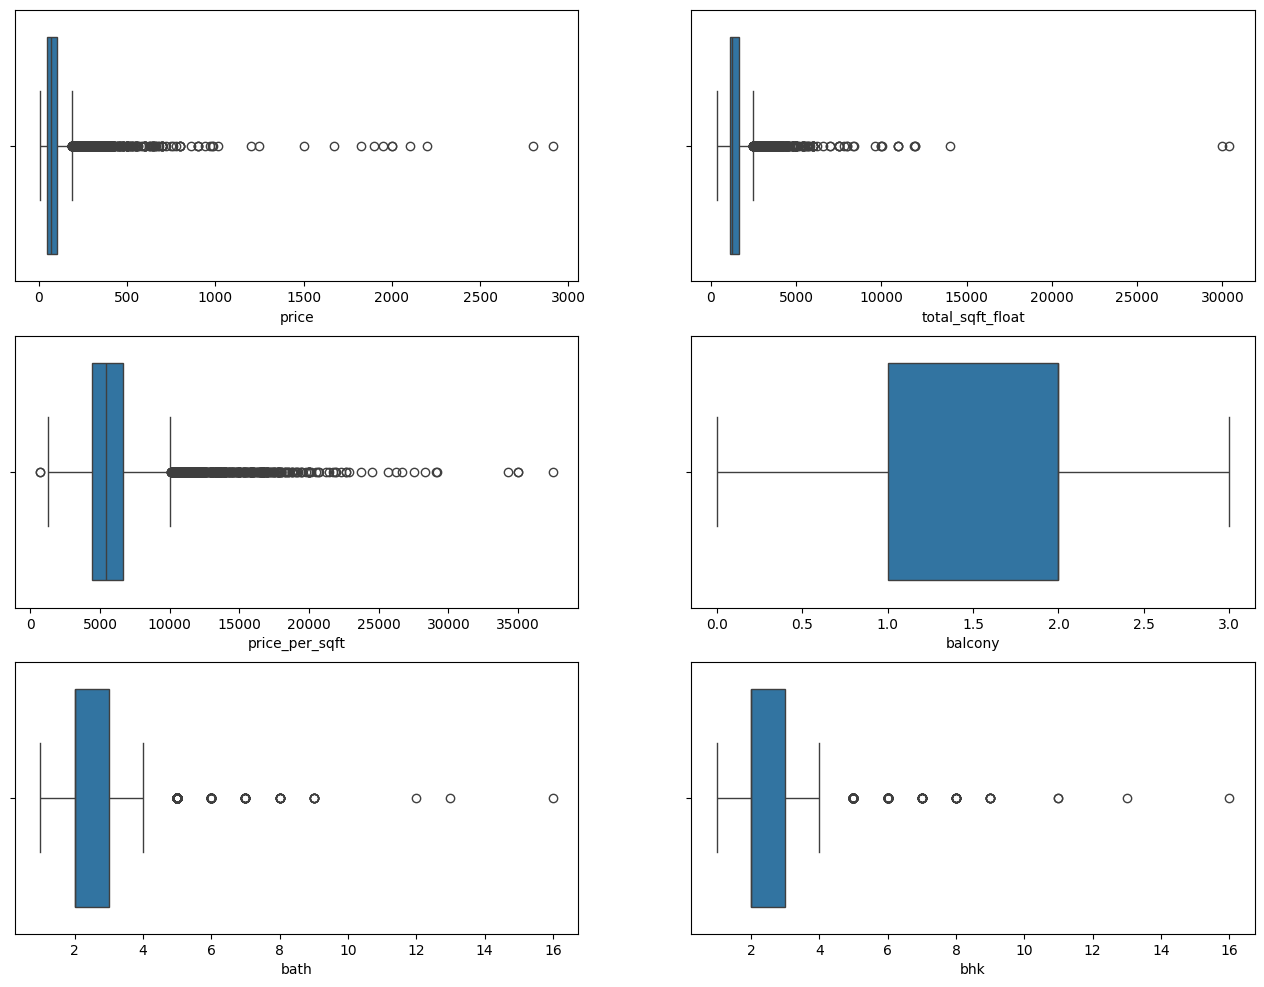

In [164]:
plt.figure(figsize = (16,12))
for i, var in enumerate(vars):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = raw11[var])

**Exercise 4** Feature Selection\
Remove redundant features

In [166]:
raw12 = raw11.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis = 1)
raw12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,1.0,1.0,16.0,351.0,1,4558.404558
1,1.0,0.0,35.0,527.0,1,6641.366224
2,1.0,1.0,50.0,670.0,1,7462.686567
3,3.0,2.0,150.0,1672.0,3,8971.291866
4,3.0,3.0,149.0,1750.0,3,8514.285714


In [167]:
# Save the processed dataset
raw12.to_csv("clean_data.csv", index = False)

**Exercise 5** 

In [197]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.figure(figsize = (16,9))
    plt.scatter(bhk2['total_sqft_float'], bhk2['price'], color = 'Blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft_float'], bhk3['price'], color = 'Orange', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.grid(True)
    plt.legend()

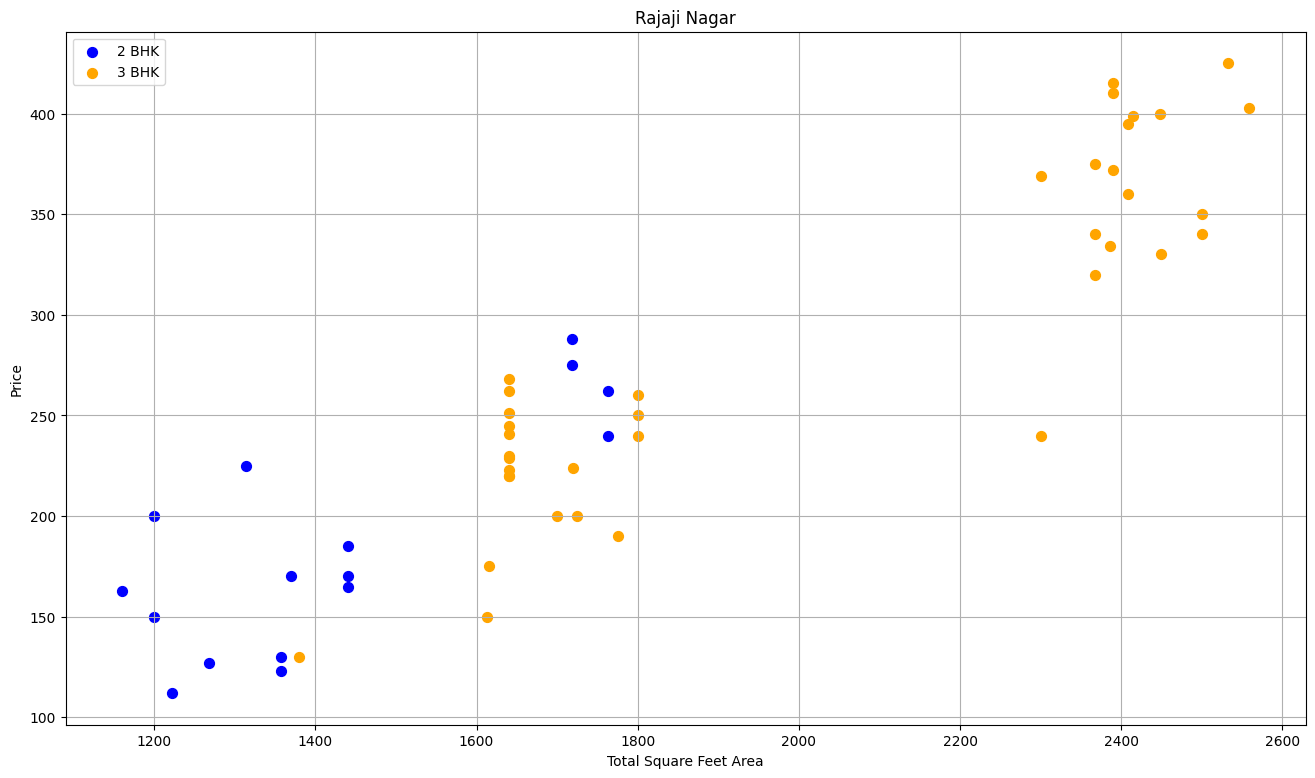

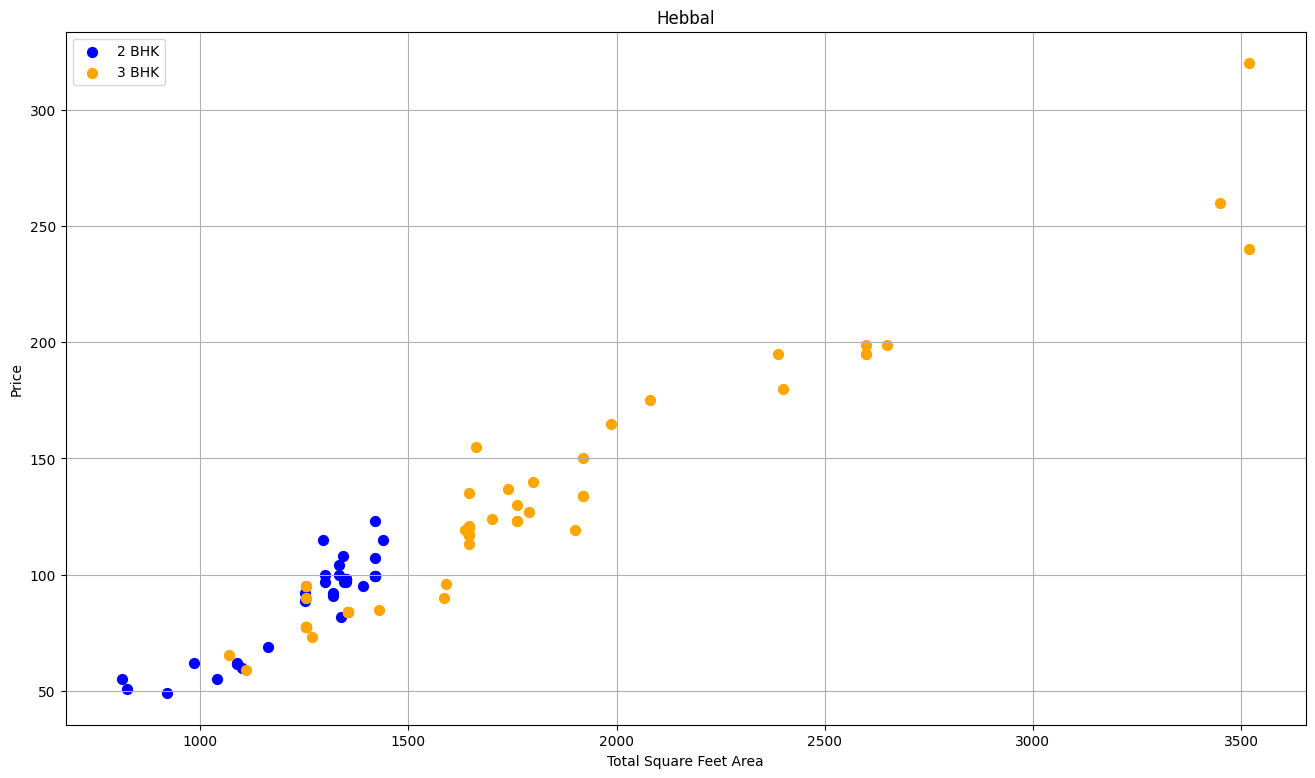

In [196]:
plot_scatter_chart(raw9, "Rajaji Nagar")
plot_scatter_chart(raw9, "Hebbal")

**Exercise 6**

In [198]:
# Thống kê giá nhà theo từng loại diện tích (area_type)
raw9['area_type'].value_counts()

area_type
Super built-up  Area    7002
Built-up  Area          1739
Plot  Area               631
Carpet  Area              49
Name: count, dtype: int64

In [200]:
# Giá price_per_sqft theo từng area_type
area_price = raw9.groupby('area_type')['price_per_sqft'].mean()
print(area_price)

area_type
Built-up  Area          5561.865462
Carpet  Area            5830.867192
Plot  Area              8235.660621
Super built-up  Area    5586.057345
Name: price_per_sqft, dtype: float64


/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_29076/1984408844.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(raw2['area_type'], rotation = 60, horizontalalignment = 'right')


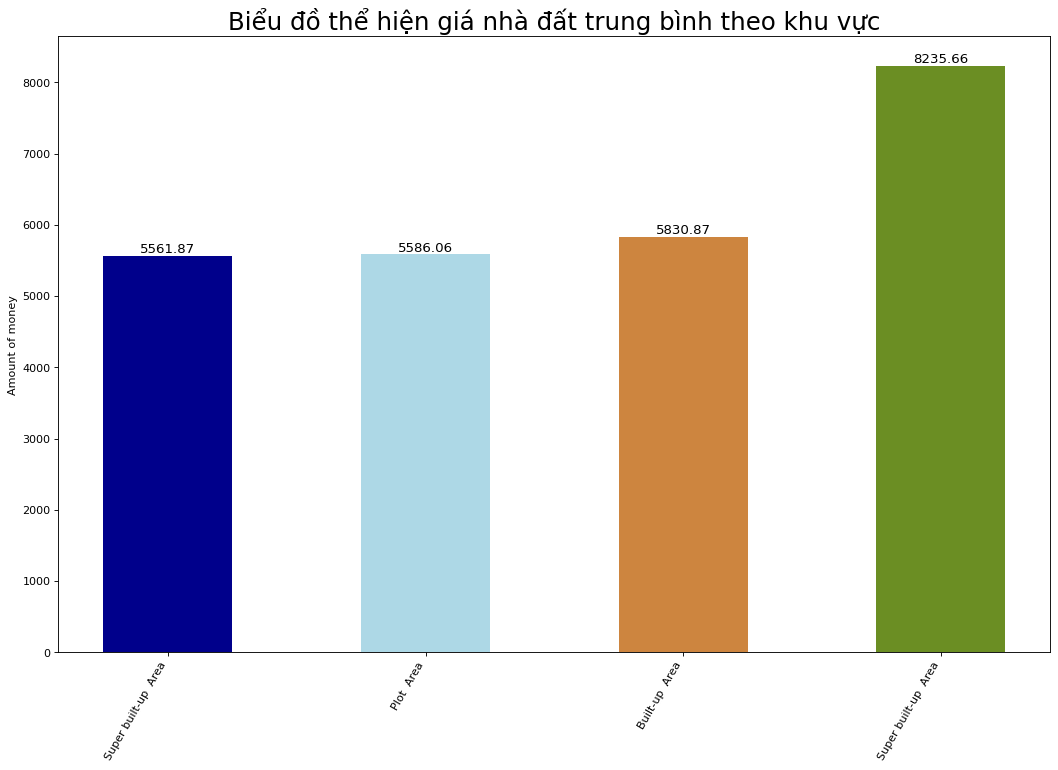

In [209]:
import random 

raw91 = raw9.groupby('area_type')['price_per_sqft'].mean().reset_index(name='money')
raw91 = raw91.sort_values(by = 'money') 

raw91['money'] = raw91['money'].apply(lambda x : round(x, 2))
n = raw91['area_type'].unique().__len__() 
all_colors = list(plt.cm.colors.cnames.keys())

random.seed(100) # Random colors for columns
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16,10), dpi = 80)
plt.bar(raw91['area_type'], raw91['money'], color = c, width = .5)
for i, val in enumerate(raw91['money'].values):
    plt.text(i, val, float(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'fontweight' : 500, 'size' : 12})

plt.gca().set_xticklabels(raw2['area_type'], rotation = 60, horizontalalignment = 'right')
plt.title("Price per Sqft ", fontsize = 22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

# II. Model Training

## 1. Load Dataset

In [214]:
df = pd.read_csv('clean_data.csv')
df

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,1.0,1.000000,16.000,351.00,1,4558.404558
1,1.0,0.000000,35.000,527.00,1,6641.366224
2,1.0,1.000000,50.000,670.00,1,7462.686567
3,3.0,2.000000,150.000,1672.00,3,8971.291866
4,3.0,3.000000,149.000,1750.00,3,8514.285714
5,3.0,2.000000,150.000,1750.00,3,8571.428571
6,2.0,2.000000,40.000,1250.00,2,3200.000000
7,2.0,2.000000,83.000,1200.00,2,6916.666667
8,2.0,2.000000,40.000,1170.00,2,3418.803419
9,2.0,2.000000,65.000,1425.00,3,4561.403509


In [215]:
df.shape

(7647, 6)

In [216]:
df.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,1.0,1.0,16.0,351.0,1,4558.404558
1,1.0,0.0,35.0,527.0,1,6641.366224
2,1.0,1.0,50.0,670.0,1,7462.686567
3,3.0,2.0,150.0,1672.0,3,8971.291866
4,3.0,3.0,149.0,1750.0,3,8514.285714


In [217]:
df.tail()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
7642,2.0,1.000000,48.00,880.0,2,5454.545455
7643,2.0,1.000000,55.00,1000.0,2,5500.000000
7644,2.0,1.000000,78.00,1400.0,3,5571.428571
7645,6.0,1.584376,275.00,2100.0,6,13095.238095
7646,2.0,1.000000,32.73,935.0,2,3500.534759


## 2. Data Splitting

In [218]:
# Define X (features) and y (label)
X = df.drop("price", axis = 1)
y = df['price']

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [220]:
# Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# 3. Algorithms


## 3.1. Linear Regression 

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [223]:
# Initialize 3 models
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [226]:
# define RMSE function
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [228]:
# Train Linear Regression model
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # R^2 score
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.8068721507658511, np.float64(65.47640222950564))

In [229]:
# Train Lasso model
lr_lasso.fit(X_train, y_train)
lr_lasso_score = lr_lasso.score(X_test, y_test) # R^2 score
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8026769044731925, np.float64(66.18374162823173))

In [230]:
# Train Ridge model
lr_ridge.fit(X_train, y_train)
lr_ridge_score = lr_ridge.score(X_test, y_test) # R^2 score
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.8068388689946671, np.float64(65.48204376895588))

## 3.2. Support Vector Machine

In [235]:
from sklearn.svm import SVR

In [238]:
svr = SVR()
svr.fit(X_train, y_train)
svr_score = svr.score(X_test, y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.2303750377608672, np.float64(130.70792751517834))

## 3.3. Random Forest

In [239]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
rf_rmse = rmse(y_test, rf.predict(X_test))
rf_score, rf_rmse

(0.9682975563240968, np.float64(26.52825758230016))

# 4. Model Testing

In [242]:
def predict_house_price(model, bath, balcony, total_sqft_int, bhk, price_per_sqft, area_type, availability, location):
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = total_sqft_int
    x[3] = bhk
    x[4] = price_per_sqft

    if "availability" == "Ready To Move":
        x[8] = 1

    if 'area_type'+ area_type in X.columns:
        area_type_index = np.where(X.columns == "area_type" + area_type)[0][0]
        x[area_type_index] = 1

    if 'location_' + location in X.columns:
        loc_index = np.where(X.columns == "location_" + location)[0][0]
        x[loc_index] = 1

    x = sc.transform([x])[0] 

    return model.predict([x])[0] 


In [250]:
# Test Linear Regression
lr_test = predict_house_price(model = lr, bath = 3, balcony = 2, total_sqft_int = 1672, bhk = 3, price_per_sqft = 8971.291866, area_type = "Plot  Area", availability = "Ready To Move", location = "Devarabeesana Halli")
print("Test Linear Regression: ", lr_test)
# Test Lasso
lr_lasso_test = predict_house_price(model = lr_lasso, bath = 3, balcony = 2, total_sqft_int = 1672, bhk = 3, price_per_sqft = 8971.291866, area_type = "Plot  Area", availability = "Ready To Move", location = "Devarabeesana Halli")
print("Test Lasso: ", lr_lasso_test)
# Test Ridge 
lr_ridge_test = predict_house_price(model = lr_ridge, bath = 3,balcony = 2, total_sqft_int = 1672, bhk = 3, price_per_sqft = 8971.291866, area_type = "Plot  Area", availability = "Ready To Move", location = "Devarabeesana Halli")
print("Test Ridge: ", lr_ridge_test)

Test Linear Regression:  173.88744575442686
Test Lasso:  174.07890382328043
Test Ridge:  173.88435293104214


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [251]:
# Test SVM
svm_test = predict_house_price(model = svr, bath = 3, balcony = 2, total_sqft_int = 1672, bhk = 3,price_per_sqft = 8971.291866, area_type = "Plot  Area", availability = "Ready To Move", location = "Devarabeesana Halli")
print("Test SVM: ", svm_test)

Test SVM:  153.74085489524703


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [253]:
# Test Random Forest
rf_test = predict_house_price(model = rf, bath = 3, balcony = 2, total_sqft_int = 1672, bhk = 3,price_per_sqft = 8971.291866, area_type = "Plot  Area", availability = "Ready To Move", location = "Devarabeesana Halli")
print("Test Random Forest: ", rf_test)

Test Random Forest:  150.11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 5. Save & Load Model

In [255]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf, 'bangalore_house_price_prediction_model.pkl')

['bangalore_house_price_prediction_model.pkl']

In [256]:
# Load the model
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_model.pkl")

In [ ]:
# Test the loaded model
predict_house_price(bangalore_house_price_prediction_model, bath = 3, balcony = 3, total_sqft_int = 150, bhk = 3, price_per_sqft = 8514.285714, area_type = "Built-up Area", availability = "Ready To Move", location = "Devarabeesana Halli")